## ITDI Shared Task @ VarDial 2022 submission


In this notebook, we briefly introduce how to train and validate the Logistic Regression model developed to tackle the Identification of Languages and Dialects of Italy task from VarDial 2022 shared task. 

### Data loading
Firstly, we import some useful libraries and read the training and development data.

In [1]:
import pandas as pd
from utils import explain_label
from sklearn.model_selection import train_test_split

In [2]:
data_train = pd.read_csv("train.csv")
data, labels = data_train['text'].values, data_train['label'].values.astype(int)
_, data, _, labels = train_test_split(data, labels, test_size=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=1)

### Model training
Import and initialize the logistic regression model. Fit it using the given training and validation data.

In [3]:
from models import LogisticRegressionITDI

model = LogisticRegressionITDI(verbose=1)
_, _, cm = model.fit(X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test)

Vectorizing and normalizing training data...
Fitting Logistic Regression...
Evaluating the model...
Training completed, train_f1 : 0.9998019681321025, val_f1 : 0.9853557972559892


Finally, plot the confusion matrix for the validation set.

In [4]:
print(cm.shape)

(5, 5)


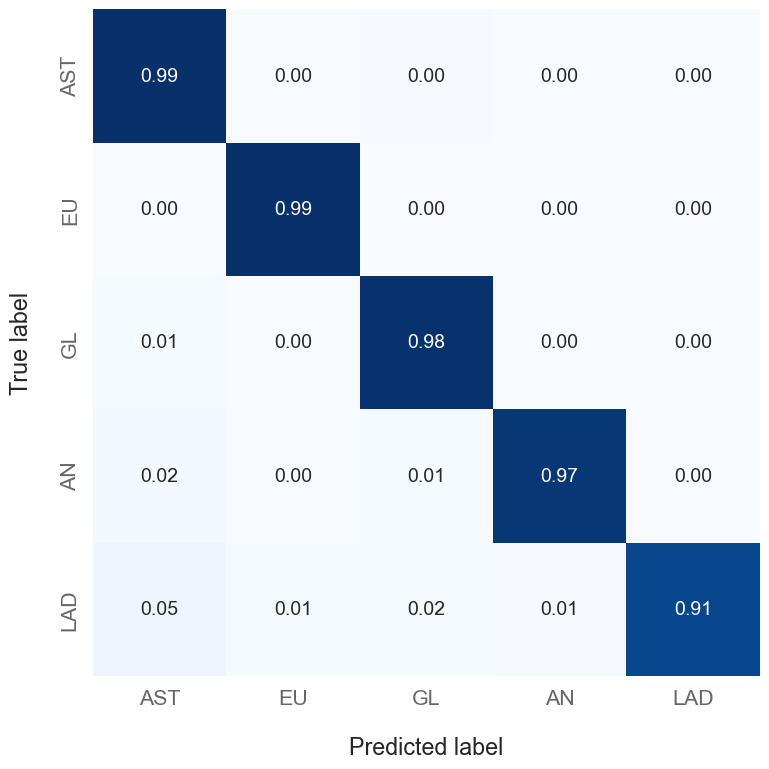

In [5]:
from utils import explain_label
import matplotlib.pyplot as plt
import seaborn as sns

df_cm = pd.DataFrame(cm, index = [explain_label(i)[:3] for i in range(0,5)], columns = [explain_label(i)[:3] for i in range(0,5)])

plt.figure(figsize = (8, 8))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(df_cm, 
            annot=True, 
            annot_kws={"size": 14}, 
            fmt='.2f', 
            cmap="Blues",
            cbar=False) 

plt.xlabel("Predicted label", labelpad=20)
plt.ylabel("True label", labelpad=20)

plt.setp(ax.get_xticklabels(), alpha=0.7)
plt.setp(ax.get_yticklabels(), alpha=0.7)

plt.tight_layout()  
plt.show()

Predict for the validation set and print some nice metrics for the dialects. 

In [6]:
pred = model.predict(X_test)

In [7]:
from sklearn.metrics import classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings

with warnings.catch_warnings(): 
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)
    print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8181
           1       1.00      0.99      1.00      9254
           2       0.98      0.98      0.98      6063
           3       0.98      0.97      0.97      4122
           4       0.99      0.91      0.95       514

    accuracy                           0.99     28134
   macro avg       0.99      0.97      0.98     28134
weighted avg       0.99      0.99      0.99     28134



### Inference
And now, some inference! Let's try to classify some Spanish dialects sentences that are not in the training set.

In [8]:
sentence = "estió un monesterio establito en se devantó a ma regla que dimpués fue seguita por cuantos monesterios griegos"
explain_label(model.predict(sentence)[0])

'AN'

In [9]:
sentence = "liña en universal"
explain_label(model.predict(sentence)[0])

'GL'

In [10]:
sentence = "lleis fonétiques sistemáticu palatalizan evolución"
explain_label(model.predict(sentence)[0])

'AST'